# Exercise sheet

Some general remarks about the exercises:
* For your convenience functions from the lecture are included below. Feel free to reuse them without copying to the exercise solution box.
* For each part of the exercise a solution box has been added, but you may insert additional boxes. Do not hesitate to add Markdown boxes for textual or LaTeX answers (via `Cell > Cell Type > Markdown`). But make sure to replace any part that says `YOUR CODE HERE` or `YOUR ANSWER HERE` and remove the `raise NotImplementedError()`.
* Please make your code readable by humans (and not just by the Python interpreter): choose informative function and variable names and use consistent formatting. Feel free to check the [PEP 8 Style Guide for Python](https://www.python.org/dev/peps/pep-0008/) for the widely adopted coding conventions or [this guide for explanation](https://realpython.com/python-pep8/).
* Make sure that the full notebook runs without errors before submitting your work. This you can do by selecting `Kernel > Restart & Run All` in the jupyter menu.
* For some exercises test cases have been provided in a separate cell in the form of `assert` statements. When run, a successful test will give no output, whereas a failed test will display an error message.
* Each sheet has 100 points worth of exercises. Note that only the grades of sheets number 2, 4, 6, 8 count towards the course examination. Submitting sheets 1, 3, 5, 7 & 9 is voluntary and their grades are just for feedback.

Please fill in your name here:

In [1]:
NAME = "Kees van Kempen"
NAMES_OF_COLLABORATORS = ""

---

__Exercise sheet 2__

Code from the lecture:

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import quad

rng = np.random.default_rng()
%matplotlib inline

def inversion_sample(f_inverse):
    '''Obtain an inversion sample based on the inverse-CDF f_inverse.'''
    return f_inverse(rng.random())

def compare_plot(samples,pdf,xmin,xmax,bins):
    '''Draw a plot comparing the histogram of the samples to the expectation coming from the pdf.'''
    xval = np.linspace(xmin,xmax,bins+1)
    binsize = (xmax-xmin)/bins
    # Calculate the expected numbers by numerical integration of the pdf over the bins
    expected = np.array([quad(pdf,xval[i],xval[i+1])[0] for i in range(bins)])/binsize
    measured = np.histogram(samples,bins,(xmin,xmax))[0]/(len(samples)*binsize)
    plt.plot(xval,np.append(expected,expected[-1]),"-k",drawstyle="steps-post")
    plt.bar((xval[:-1]+xval[1:])/2,measured,width=binsize)
    plt.xlim(xmin,xmax)
    plt.legend(["expected","histogram"])
    plt.show()
    
def gaussian(x):
    return np.exp(-x*x/2)/np.sqrt(2*np.pi)

## Sampling random variables via the inversion method 
__(35 Points)__

Recall from the lecture that for any real random variable $X$ we can construct an explicit random variable via the inversion method that is identically distributed. This random variable is given by $F_X^{-1}(U)$ where $F_X$ is the CDF of $X$ and $U$ is a uniform random variable on $(0,1)$ and 

$$
F_X^{-1}(p) := \inf\{ x\in\mathbb{R} : F_X(x) \geq p\}.
$$

This gives a very general way of sampling $X$ in a computer program, as you will find out in this exercise.

__(a)__ Let $X$ be an **exponential random variable** with **rate** $\lambda$, i.e. a continuous random variable with probability density function $f_X(x) = \lambda e^{-\lambda x}$ for $x > 0$. Write a function `f_inverse_exponential` that computes $F_X^{-1}(p)$. Illustrate the corresponding sampler with the help of the function `compare_plot` above. __(10 pts)__

Reasoning from the PDF, we can find the CDF and invert that as follows.

$$
f_X(x) = \lambda{}e^{-\lambda{}x}
$$
$$
\implies F_X(x)
       = \int_{-\infty}^x f_X(t)dt
       = \int_0^x \lambda{}e^{-\lambda{}t}dt
       = \left[ -e^{\lambda{}t} \right]_{t = 0}^x
       = 1 - e^{\lambda{}x}
       = \mathbb{P}(X \leq x) = p
$$
for $x \in [0, \infty)$, otherwise zero.

Now we seek $x$ as a function of $p$.

$$
1 - e^{\lambda{}x} = p
\iff -\lambda{}x = \ln{(1-p)}
\iff x = \frac{\ln{(1-p)}}{-\lambda} = F^{-1}_X(p)
$$
which works, as $1 - p \geq 0$ as $p \in [0, 1]$, allowing $\ln{0} = -\infty$.

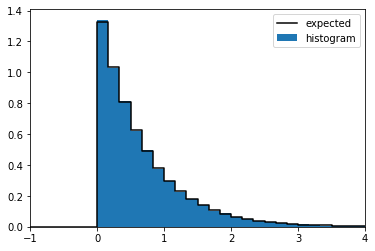

In [3]:
def f_inv_exponential(lam,p):
    return -np.log(1 - p)/lam

f_X = lambda x, lam: lam*np.exp(-lam*x) if x >= 0 else 0

for lam in [1.5]:
    pdf = lambda x: f_X(x, lam)
    samples = [inversion_sample(lambda p: f_inv_exponential(lam, p)) for _ in range(100000)]
    compare_plot(samples, pdf, -1, 4, 30)

In [4]:
from nose.tools import assert_almost_equal
assert_almost_equal(f_inv_exponential(1.0,0.6),0.916,delta=0.001)
assert_almost_equal(f_inv_exponential(0.3,0.2),0.743,delta=0.001)

__(b)__ Let now $X$ have the **Pareto distribution** of **shape** $\alpha > 0$ on $(b,\infty)$, which has  probability density function $f_X(x) = \alpha b^{\alpha} x^{-\alpha-1}$ for $x > b$. Write a function `f_inv_pareto` that computes $F_X^{-1}(p)$. Compare a histogram with a plot of $f_X(x)$ to verify your function numerically. __(10 pts)__

YOUR ANSWER HERE

In [ ]:
### Solution
def f_inv_pareto(alpha,b,p):
    # YOUR CODE HERE
    raise NotImplementedError()

# plotting
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
from nose.tools import assert_almost_equal
assert_almost_equal(f_inv_pareto(1.0,1.5,0.6),3.75,delta=0.0001)
assert_almost_equal(f_inv_pareto(2.0,2.25,0.3),2.689,delta=0.001)

__(c)__ Let $X$ be a discrete random variable taking values in $\{1,2,\ldots,n\}$. Write a Python function `f_inv_discrete` that takes the probability mass function $p_X$ as a list `prob_list` given by $[p_X(1),\ldots,p_X(n)]$ and returns a random sample with the distribution of $X$ using the inversion method. Verify the working of your function numerically on an example. __(15 pts)__

In [ ]:
def f_inv_discrete(prob_list,p):
    # YOUR CODE HERE
    raise NotImplementedError()

# plotting
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert f_inv_discrete([0.5,0.5],0.4)==1
assert f_inv_discrete([0.5,0.5],0.8)==2
assert f_inv_discrete([0,0,1],0.1)==3

## Central limit theorem? 
__(35 Points)__

In this exercise we will have a closer look at central limits of the Pareto distribution, for which you implemented a random sampler in the previous exercise. By performing the appropriate integrals it is straightforward to show that 

$$ 
\mathbb{E}[X] = \begin{cases} \infty & \text{for }\alpha \leq 1 \\ \frac{\alpha b}{\alpha - 1} & \text{for }\alpha > 1 \end{cases}, \qquad \operatorname{Var}(X) = \begin{cases} \infty & \text{for }\alpha \leq 2 \\ \frac{\alpha b^2}{(\alpha - 1)^2(\alpha-2)} & \text{for }\alpha > 2 \end{cases}.
$$

This shows in particular that the distribution is **heavy tailed**, in the sense that some moments $\mathbb{E}[X^k]$ diverge.

__(a)__ Write a function `sample_Zn` that produces a random sample for $Z_n= \frac{\sqrt{n}}{\sigma_X}(\bar{X}_n - \mathbb{E}[X])$ given $\alpha>2$, $b>0$ and $n\geq 1$. Visually verify the central limit theorem for $\alpha = 4$, $b=1$ and $n=1000$ by comparing a histogram of $Z_n$ to the standard normal distribution (you may use `compare_plot`). __(10 pts)__

In [ ]:
def sample_Zn(alpha,b,n):
    # YOUR CODE HERE
    raise NotImplementedError()

# Plotting
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert_almost_equal(np.mean([sample_Zn(3.5,2.1,100) for _ in range(100)]),0,delta=0.3)
assert_almost_equal(np.std([sample_Zn(3.5,2.1,100) for _ in range(100)]),1,delta=0.3)

__(b)__ Now take $\alpha = 3/2$ and $b=1$. 
With some work (which you do not have to do) one can show that the characteristic function of $X$ admits the following expansion around $t=0$,

$$
\varphi_X(t) = 1 + 3 i t - (|t|+i t)\,\sqrt{2\pi|t|} + O(t^{2}).
$$

Based on this, prove the **generalized CLT** for this particular distribution $X$ which states that $Z_n = c\, n^{1/3} (\bar{X}_n - \mathbb{E}[X])$ in the limit $n\rightarrow\infty$ converges in distribution, with a to-be-determined choice of overall constant $c$, to a limiting random variable $\mathcal{S}$ with characteristic function 

$$
\varphi_{\mathcal{S}}(t) = \exp\big(-(|t|+it)\sqrt{|t|}\big).
$$

__(15 pts)__

YOUR ANSWER HERE

__(c)__ The random variable $\mathcal{S}$ has a [stable Lévy distribution](https://en.wikipedia.org/wiki/Stable_distribution) with index $\alpha = 3/2$ and skewness $\beta = 1$. Its probability density function $f_{\mathcal{S}}(x)$ does not admit a simple expression, but can be accessed numerically using SciPy's `scipy.stats.levy_stable.pdf(x,1.5,1.0)`. Verify numerically that the generalized CLT of part (b) holds by comparing an appropriate histogram to this PDF. __(10 pts)__

In [ ]:
from scipy.stats import levy_stable

# YOUR CODE HERE
raise NotImplementedError()

## Joint probability density functions and sampling the normal distribution 
__(30 Points)__

Let $\Phi$ be a uniform random variable on $(0,2\pi)$ and $R$ an independent continuous random variable with probability density function $f_R(r) = r\,e^{-r^2/2}$ for $r>0$. Set $X = R \cos \Phi$ and $Y = R \sin \Phi$. This is called the **Box-Muller transform**.

__(a)__ Since $\Phi$ and $R$ are independent, the joint probability density of $\Phi$ and $R$ is $f_{\Phi,R}(\phi,r) = f_\Phi(\phi)f_R(r) = \frac{1}{2\pi}\, r\,e^{-r^2/2}$. Show by change of variables that $X$ and $Y$ are also independent and both distributed as a standard normal distribution $\mathcal{N}$. __(15 pts)__

YOUR ANSWER HERE

__(b)__ Write a function to sample a pair of independent normal random variables using the Box-Muller transform. Hint: to sample $R$ you can use the inversion method of the first exercise. Produce a histogram to check the distribution of your normal variables. __(15 pts)__

In [ ]:
def random_normal_pair():
    '''Return two independent normal random variables.'''
    # YOUR CODE HERE
    raise NotImplementedError()
    return x, y

# Plotting
# YOUR CODE HERE
raise NotImplementedError()